In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('Data/HospitalityEmployees.csv')
df.head()

,Date,Employees
0,1/1/1990,1064.5
1,2/1/1990,1074.5
2,3/1/1990,1090.0
3,4/1/1990,1097.4
4,5/1/1990,1108.7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       348 non-null    object 
 1   Employees  348 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.6+ KB


In [4]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      348 non-null    datetime64[ns]
 1   y       348 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.6 KB


<AxesSubplot:xlabel='ds'>

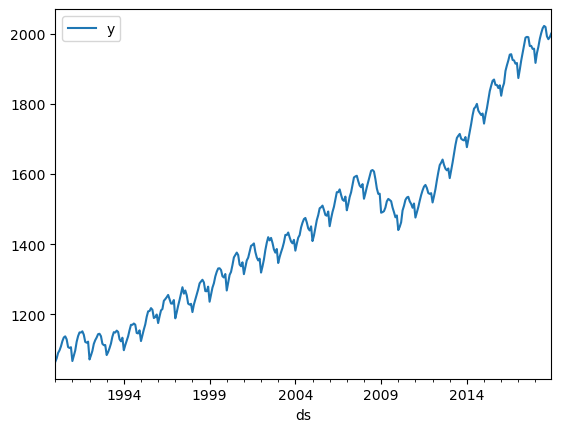

In [5]:
df.plot(x='ds', y='y')

In [6]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)
forecast

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -2.47716
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1396.59    0.00175288       591.831           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1507.21   0.000536824       1092.57           1           1      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1529.69     0.0291144       3128.37           1           1      332   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        1543.3   0.000247687       332.187           1           1      441   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        1551.1    0.00114209        1896.6      0.6678      0.6678      550   
    Iter      log prob        ||dx||      ||grad||       alpha  

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1990-01-01,1107.174352,1046.657755,1072.846084,1107.174352,1107.174352,-47.581997,-47.581997,-47.581997,-47.581997,-47.581997,-47.581997,0.0,0.0,0.0,1059.592354
1,1990-02-01,1107.694706,1062.586232,1087.605966,1107.694706,1107.694706,-33.117482,-33.117482,-33.117482,-33.117482,-33.117482,-33.117482,0.0,0.0,0.0,1074.577224
2,1990-03-01,1108.164704,1076.625165,1102.092451,1108.164704,1108.164704,-18.636532,-18.636532,-18.636532,-18.636532,-18.636532,-18.636532,0.0,0.0,0.0,1089.528172
3,1990-04-01,1108.685059,1093.752999,1117.882238,1108.685059,1108.685059,-2.983243,-2.983243,-2.983243,-2.983243,-2.983243,-2.983243,0.0,0.0,0.0,1105.701816
4,1990-05-01,1109.188628,1110.576902,1134.551236,1109.188628,1109.188628,13.330245,13.330245,13.330245,13.330245,13.330245,13.330245,0.0,0.0,0.0,1122.518873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2019-08-01,2085.296677,2099.406331,2127.364661,2080.865773,2088.502339,28.066825,28.066825,28.066825,28.066825,28.066825,28.066825,0.0,0.0,0.0,2113.363502
356,2019-09-01,2090.814418,2088.464639,2118.091572,2084.873861,2095.341578,12.499223,12.499223,12.499223,12.499223,12.499223,12.499223,0.0,0.0,0.0,2103.313641
357,2019-10-01,2096.154168,2074.585763,2104.145068,2088.965134,2101.703930,-5.993187,-5.993187,-5.993187,-5.993187,-5.993187,-5.993187,0.0,0.0,0.0,2090.160980
358,2019-11-01,2101.671909,2071.665254,2103.654552,2092.615166,2108.958664,-13.195632,-13.195632,-13.195632,-13.195632,-13.195632,-13.195632,0.0,0.0,0.0,2088.476277


In [7]:
from fbprophet.plot import add_changepoints_to_plot

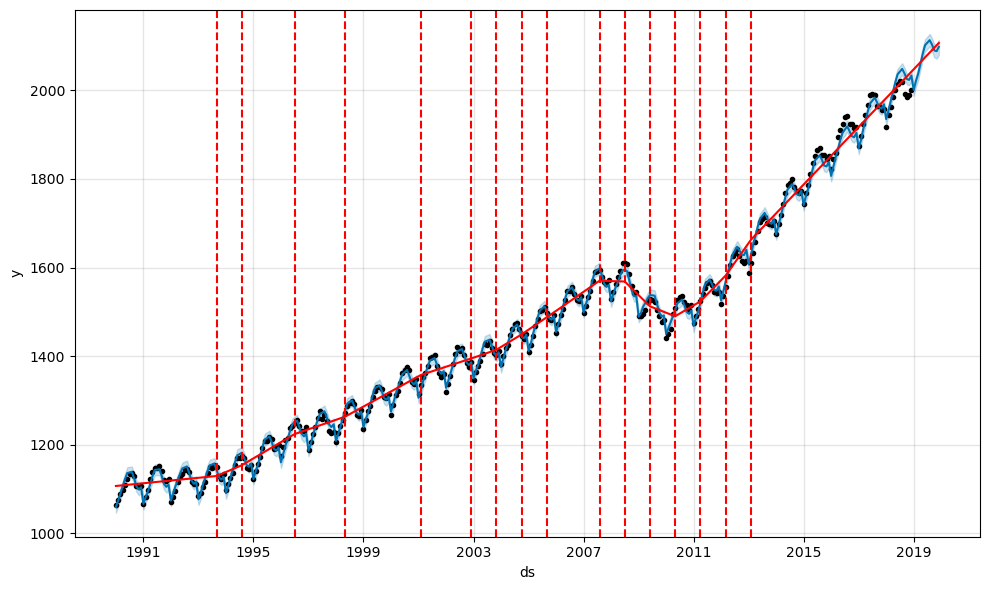

In [14]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)